In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [ ]:
# from PIL import Image
# import pathlib

# def remove_corrupted_images(directory):
#     num_deleted = 0
#     directory = pathlib.Path(directory)
#     for filepath in directory.rglob("*"):
#         if filepath.suffix.lower() not in ['.jpg', '.jpeg', '.png', '.bmp', '.gif']:
#             print(f"Skipping non-image file: {filepath}")
#             continue
#         try:
#             with Image.open(filepath) as img:
#                 img.verify()  # Check if image is valid
#         except Exception as e:
#             print(f"Deleting corrupt image: {filepath} ({e})")
#             filepath.unlink()  # Delete the corrupt image file
#             num_deleted += 1
#     print(f"Deleted {num_deleted} corrupted images from {directory}")

# # Run the cleaning on both train and validation sets
# remove_corrupted_images("./Dataset/vehicle_celebrity_images/train")
# remove_corrupted_images("./Dataset/vehicle_celebrity_images/Validation")


In [2]:
datasets = "Datasets"

base_url = os.path.join(datasets, 'Dataset')

train_dir = os.path.join(base_url, 'train')
val_dir = os.path.join(base_url, 'Validation')

In [ ]:
# from PIL import Image
# import pathlib

# def remove_corrupted_images(directory):
#     directory = pathlib.Path(directory)
#     num_deleted = 0
#     for filepath in directory.rglob("*"):
#         if filepath.is_dir():
#             continue  # ✅ skip folders like "Car", "Bus"
#         if filepath.suffix.lower() not in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]:
#             print(f"Skipping non-image file: {filepath}")
#             continue
#         try:
#             with Image.open(filepath) as img:
#                 img.verify()
#         except Exception as e:
#             print(f"Deleting corrupt image: {filepath} ({e})")
#             filepath.unlink()
#             num_deleted += 1
#     print(f"✅ Deleted {num_deleted} corrupted images from {directory}")

# # Re-run cleanup
# remove_corrupted_images(train_dir)
# remove_corrupted_images(val_dir)


In [3]:

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 360 files belonging to 4 classes.
Found 40 files belonging to 4 classes.


In [4]:
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['Bus', 'Car', 'Motorcycle', 'Truck']


In [ ]:
# def safe_load_image(path):
#     try:
#         image = tf.io.read_file(path)
#         image = tf.image.decode_image(image, channels=3)
#         return image
#     except tf.errors.InvalidArgumentError:
#         print(f"Skipping unreadable file: {path}")
#         return None


In [5]:
# Load ResNet50 base
resnet_base = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)

# Freeze the base
resnet_base.trainable = False

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',  # assuming labels are integers 0–3
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=5
)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4491 - loss: 1.8859 - val_accuracy: 0.8500 - val_loss: 0.3687
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8772 - loss: 0.3450 - val_accuracy: 0.9000 - val_loss: 0.2824
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9290 - loss: 0.2101 - val_accuracy: 0.8500 - val_loss: 0.2851
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9438 - loss: 0.1613 - val_accuracy: 0.8750 - val_loss: 0.2890
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9503 - loss: 0.1238 - val_accuracy: 0.8500 - val_loss: 0.2517


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


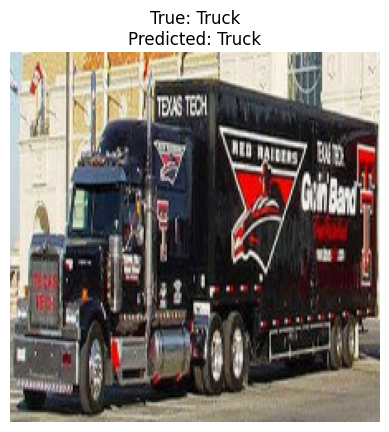

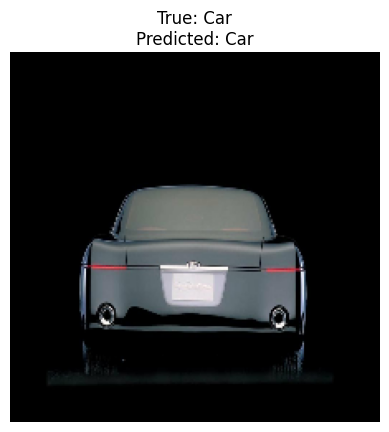

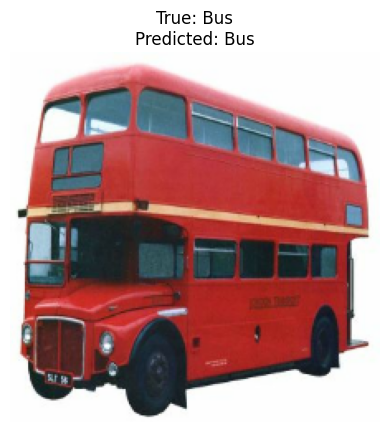

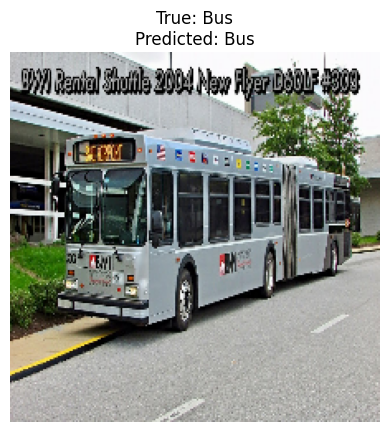

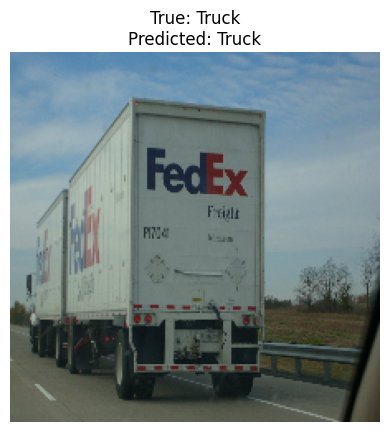

In [8]:
# Get one batch from the validation dataset
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    pred_labels = tf.argmax(preds, axis=1)

    for i in range(5):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[labels[i]]}\nPredicted: {class_names[pred_labels[i]]}")
        plt.axis('off')
        plt.show()

In [10]:
print(f"{history.history['accuracy'][-1] - 1:.2f}")

-0.04


In [11]:
model.save('vehicle_model.h5')

In [12]:
import json
with open("class_names.json", "w") as f:
    json.dump(class_names, f)